Nous allons nous attacher à l'étude fait de la première Database que nous avons obtenue. Initialement prévue pour récupérer les données d'une playlist de 10000 sons, nous avons fait face à des erreurs dues à un trop grand nombre de requêtes. Nous nous sommes ensuite rendus compte, grâce à l'étude de la première base de données partielle obtenues, que l'apporche d'une grande playlist compilant de nombreux moreceaux n'était pas la meilleure. Ce qui suit décrit cette première étude.

# Importation des données

In [41]:
from df_downloader import get_df 

df = get_df("/tlaflotte/genre_detector/spotify_tracks.csv")

# Nettoyage

Importation des modules nécessaires

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [43]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [44]:
df=df.drop(['track_id','track_name','track_artist','track_album_id', 'track_album_name','playlist_name', 'playlist_id','track_album_release_date'],axis=1)

df

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,67,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,70,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,60,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,69,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,edm,progressive electro house,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,20,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,14,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,15,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


On va regrouper les sous-genre musicaux par grands-groupes pour faciliter l'analyse.

## Analyse univariée

Analysons tout d'abord les variables catégoriques de notre dataset:

In [45]:
categorical_var = df.copy().select_dtypes(include=["object"]).columns.to_list()
categorical_var.extend(["key","mode"])


In [46]:
df[categorical_var].nunique()


playlist_genre        6
playlist_subgenre    24
key                  12
mode                  2
dtype: int64

Pour les variables avec un faible nombre de valeurs différentes, nous allons les représenter sous forme d'histogramme

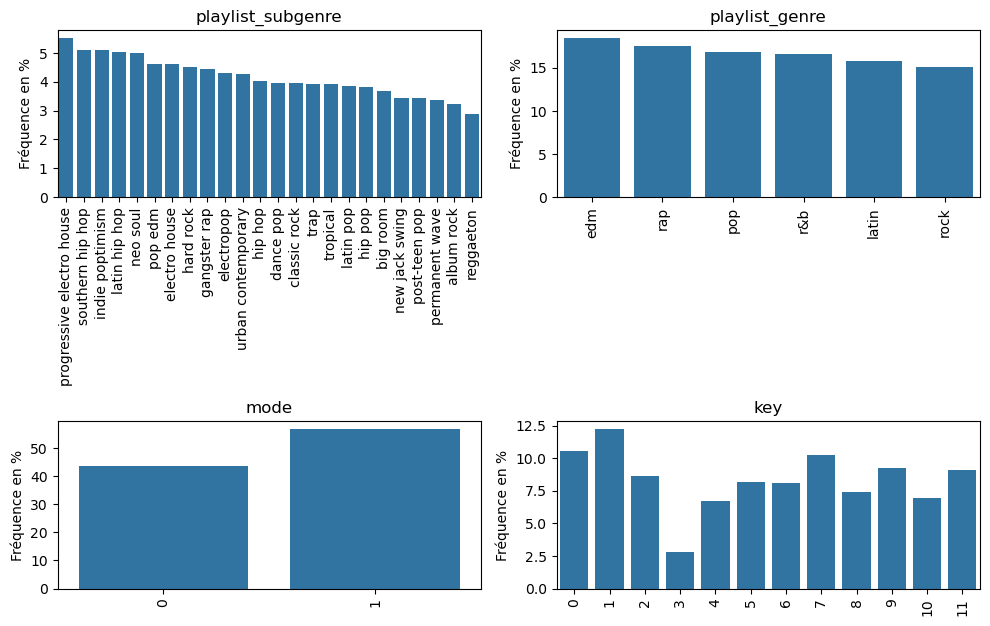

In [47]:
df_barplot = df[["playlist_subgenre","playlist_genre","mode","key"]].copy()
plt.figure(figsize=(10,10))

for c,var in enumerate(df_barplot.columns):
  # compute frequency of each unique value
  df_plot= df_barplot[var].value_counts(normalize=True).to_frame("frequency").reset_index(names=var)
  df_plot["frequency"] = df_plot["frequency"]*100

  # plot the barplot
  plt.subplot(3,2,c+1)
  sns.barplot(data=df_plot, x=var, y="frequency",)
  plt.title(str(var))
  plt.xticks(rotation=90)
  plt.xlabel("")
  plt.ylabel("Fréquence en %")

plt.tight_layout()

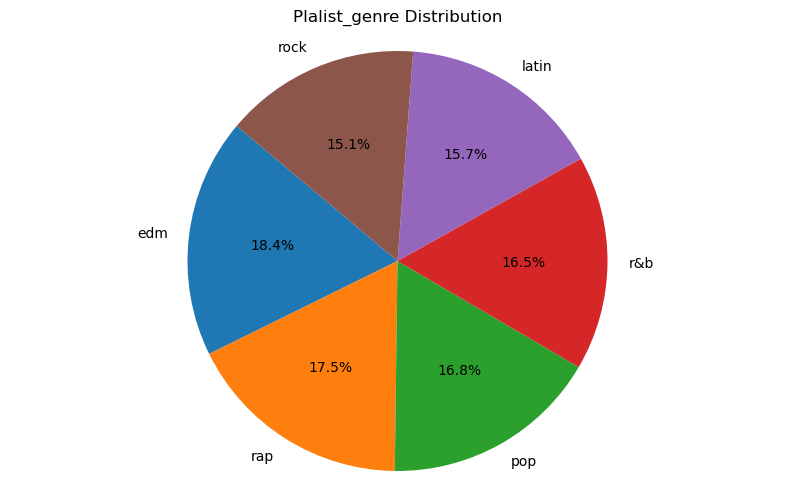

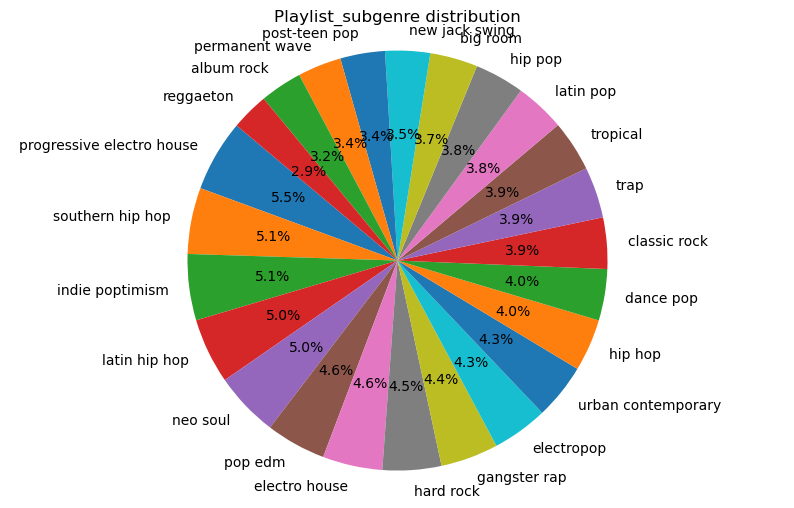

In [48]:
# Pie chart for genres
artist_counts = df['playlist_genre'].value_counts().head(10)  # Get top 10 artists for better visualization
plt.figure(figsize=(10, 6))
plt.pie(artist_counts, labels=artist_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Plalist_genre Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Pie chart for subgenres
genre_counts = df['playlist_subgenre'].value_counts() 
plt.figure(figsize=(10, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Playlist_subgenre distribution')
plt.axis('equal')  
plt.show()

In [50]:
df.isna().sum()
df.isnull().sum()

track_popularity     0
playlist_genre       0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64